In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA, FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.random_projection import GaussianRandomProjection
from sklearn.manifold import MDS, TSNE
from mpl_toolkits.mplot3d import Axes3D # For 3D plots

# Introduction to Dataset (Digits)
* A 64-dimension digit dataset typically refers to a collection of 8x8 pixel images of handwritten digits (0 through 9).
* Each of the 64 pixels in an image is considered a feature, or dimension, representing a grayscale value.
* The primary goal of dimensionality reduction in this context is to decrease the number of features from 64 to a much smaller number.
* This process can help to improve the performance of machine learning models by reducing computational complexity and mitigating the "curse of dimensionality


In [2]:
# loading dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_classes = len(np.unique(y))

print(f"Dataset Shape: {X.shape}")
print(f"Number of classes: {n_classes}")

Dataset Shape: (1797, 64)
Number of classes: 10


In [3]:
# defining a function to easily plot 2d and 3d plots for different dimensionlaity reduction methods
cmap = plt.colormaps.get_cmap('tab10').resampled(n_classes)
# 2d plots
def plot_reduction_2d(X_reduced,y,title):
    plt.figure(figsize=(10,8))
    for i in range(n_classes):
        plt.scatter(X_reduced[y==i,0],X_reduced[y==i,1],color=cmap(i),label=str(i),alpha=0.7,s=50)
        indices=np.random.choice(np.where(y==i)[0],min(20,np.sum(y==i)),replace=False)
        for idx in indices:
            plt.annotate(str(y[idx]),(X_reduced[idx,0],X_reduced[idx,1]),textcoords="offset points",xytext=(0,5),ha='center',color="black",fontsize=8,alpha=0.8)
    plt.title(title,fontsize=16)
    plt.xlabel("Component 1",fontsize=12)
    plt.ylabel("Component 2",fontsize=12)
    plt.legend(title="Digits",bbox_to_anchor=(1.05,1),loc="upper left")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_reduction_3d(X_reduced,y,title):
    fig=plt.figure(figsize=(10,8))
    ax=fig.add_subplot(111,projection='3d')

    for i in range(n_classes):
        ax.scatter(X_reduced[y==i,0],X_reduced[y==i,1],X_reduced[y==i,2],color=cmap(i),label=str(i),alpha=0.7,s=50)

        indices=np.random.choice(np.where(y==i)[0],min(10,np.sum(y==i)),replace=False)
        for idx in indices:
            ax.text(X_reduced[idx, 0], X_reduced[idx, 1],
                    X_reduced[idx, 2],str(y[idx]), color='black', fontsize=8, alpha=0.8, ha='center', va='center')

    ax.set_title(title,fontsize=16)
    ax.set_xlabel("Component 1",fontsize=12)
    ax.set_ylabel("Component 2",fontsize=12)
    ax.set_zlabel("Component 3",fontsize=12)
    ax.legend(title="Digits")
    plt.tight_layout()
    plt.show()

## Principal Component Analysis (PCA)

### 2d PCA

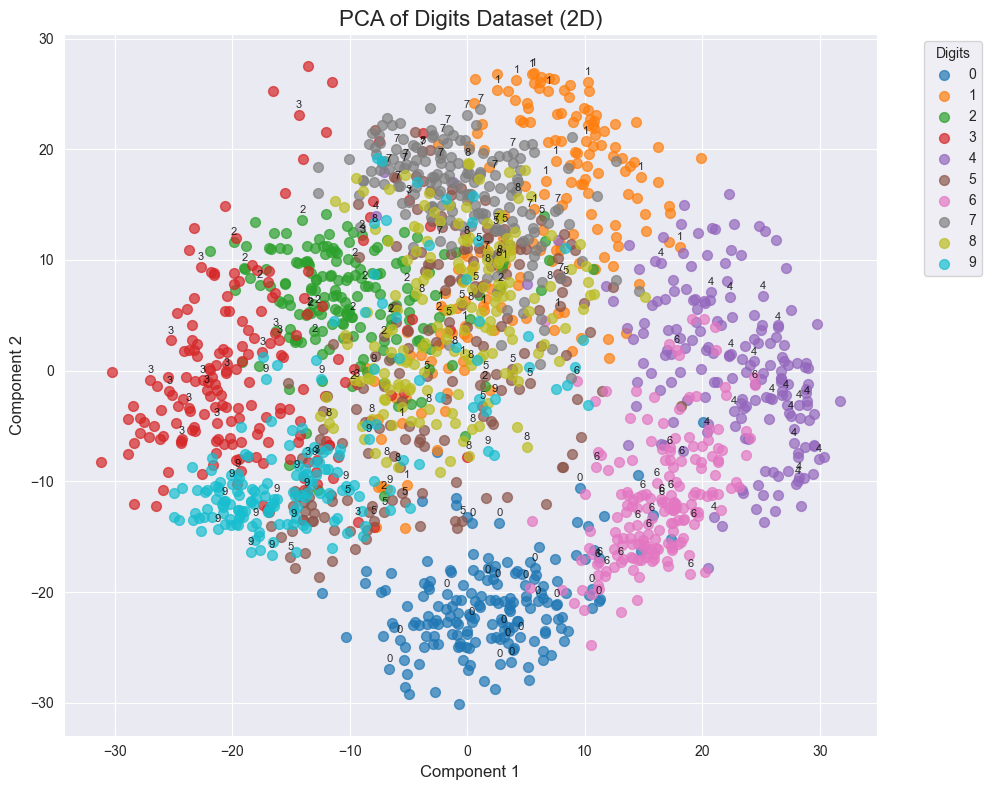

In [4]:
pca_2d=PCA(n_components=2)
X_pca_2d=pca_2d.fit_transform(X) # learns the direction of maximum variance and also project the data into new space
# fit== computes the principal axes(eigenvectors)
# transform == multiplies your data by those eigen vectors to get new coordinates in the reduced dimensional space
plot_reduction_2d(X_pca_2d,y,"PCA of Digits Dataset (2D)")

### PCA 3D


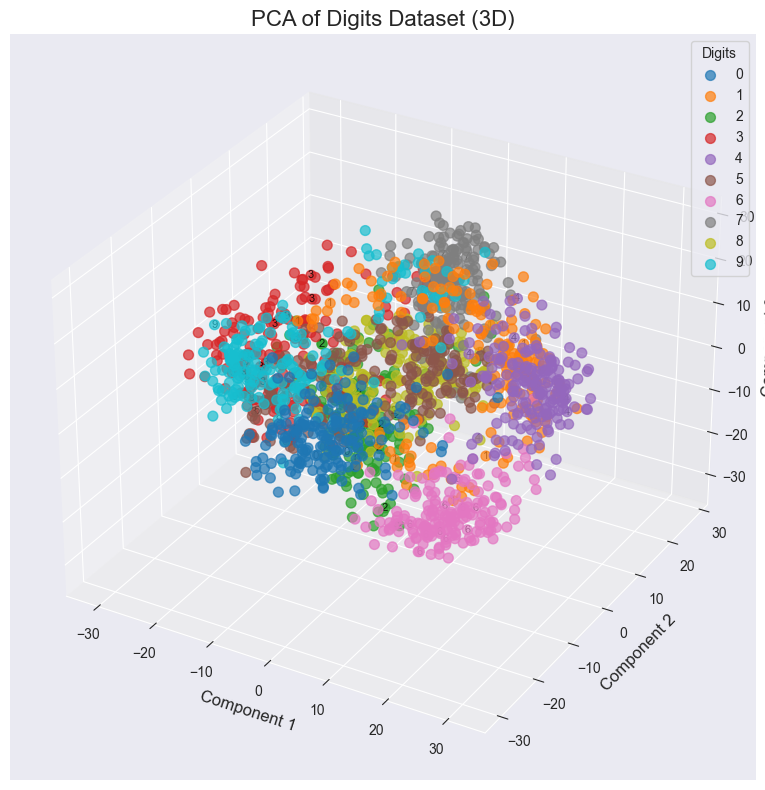

In [5]:
pca_3d=PCA(n_components=3)
X_pca_3d=pca_3d.fit_transform(X)
plot_reduction_3d(X_pca_3d,y,"PCA of Digits Dataset (3D)")

## Linear Discriminant Analysis (LDA)

### LDA 2D

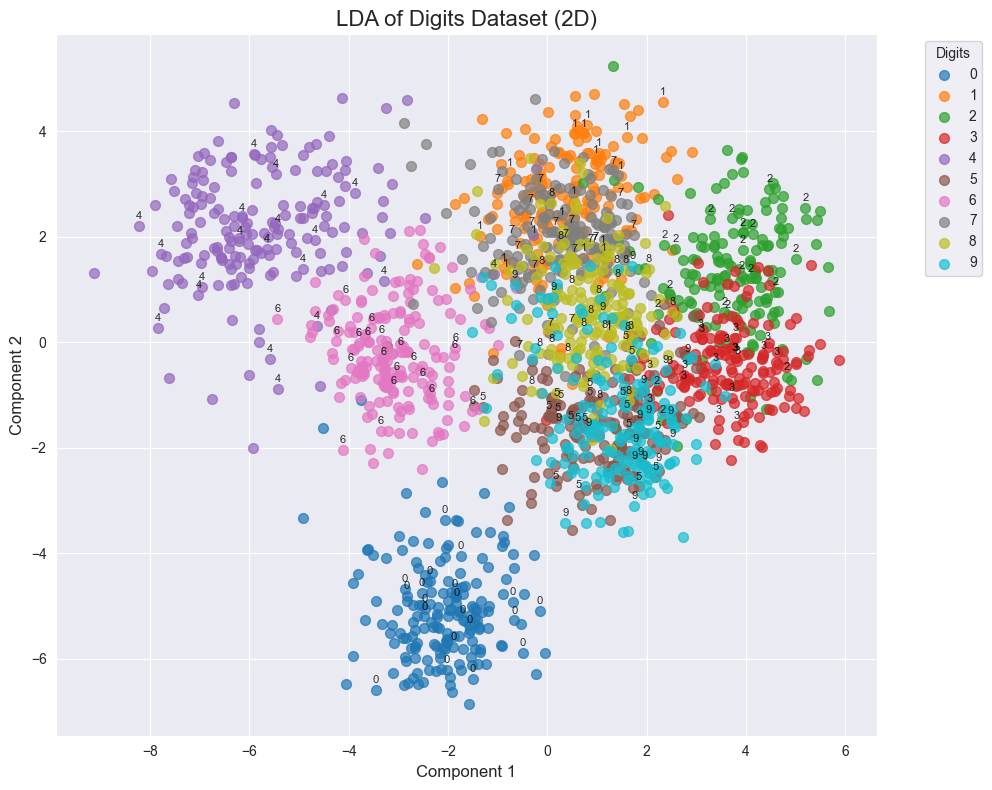

In [6]:
lda_2d=LinearDiscriminantAnalysis(n_components=2)
X_pca_2d=lda_2d.fit_transform(X,y)
plot_reduction_2d(X_pca_2d,y,"LDA of Digits Dataset (2D)")

### LDA 3D

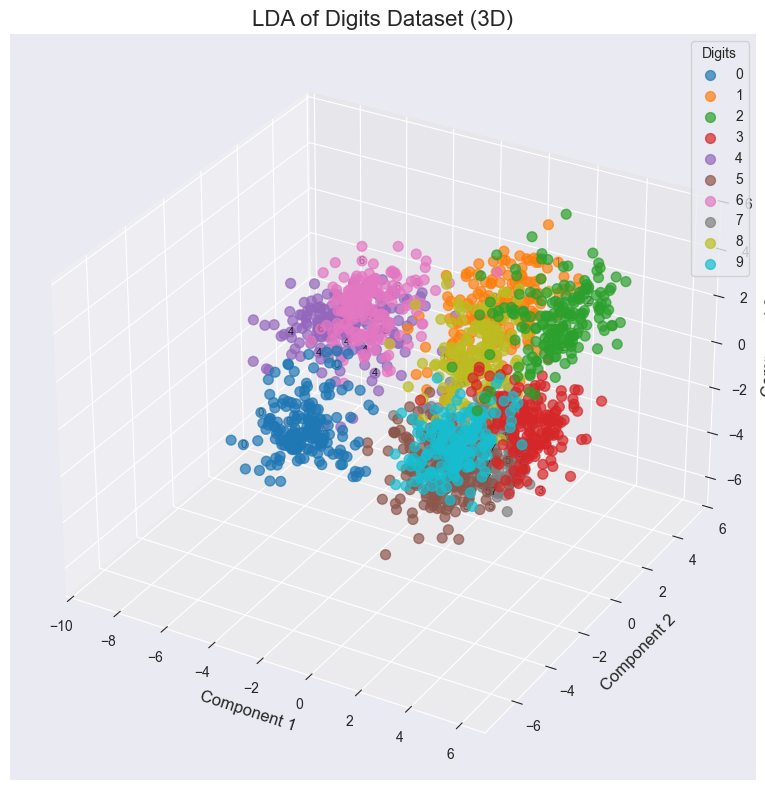

In [7]:
lda_3d=LinearDiscriminantAnalysis(n_components=3)
X_lda_3d=lda_3d.fit_transform(X,y)
plot_reduction_3d(X_lda_3d,y,"LDA of Digits Dataset (3D)")


## Independent Component Analysis(ICA)


### IDA 2D

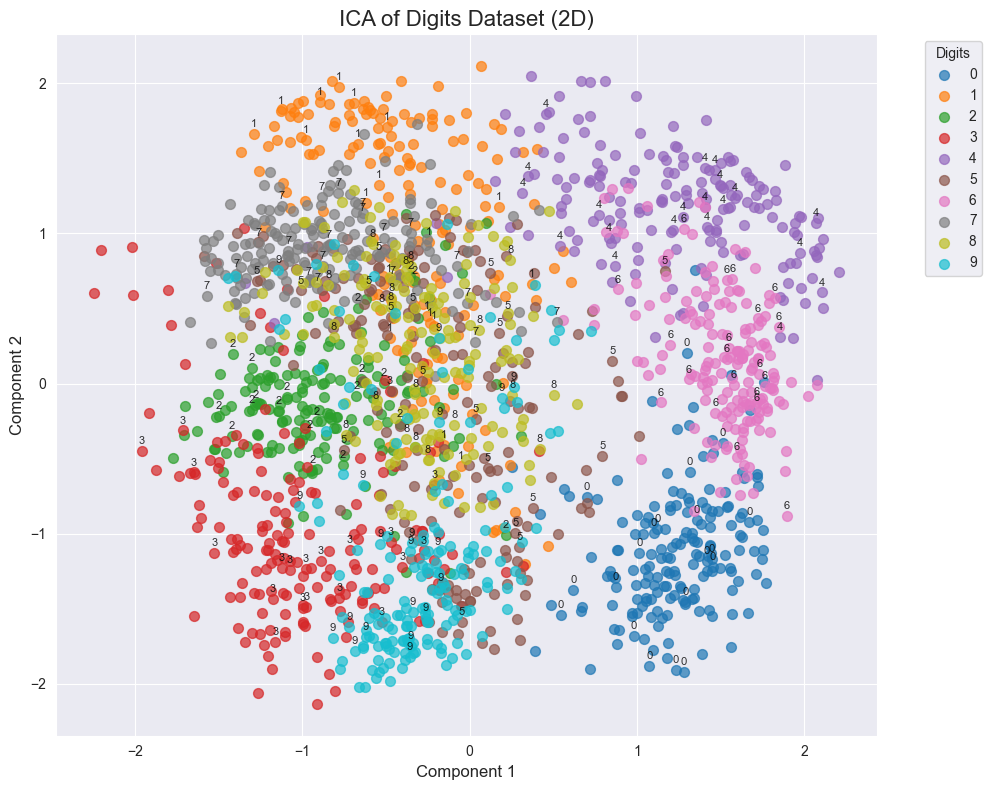

In [8]:
ica_2d=FastICA(n_components=2,whiten='unit-variance',random_state=42)
X_ica_2d=ica_2d.fit_transform(X,y)
plot_reduction_2d(X_ica_2d,y,"ICA of Digits Dataset (2D)")

### ICA 3D

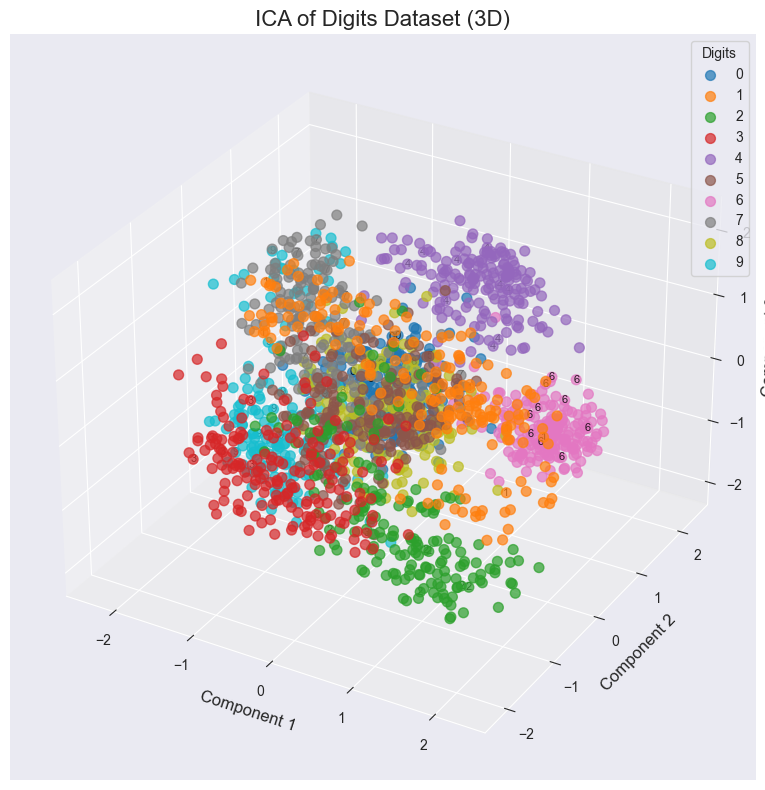

In [9]:
ica_3d=FastICA(n_components=3,whiten='unit-variance',random_state=42)
X_ica_3d=ica_3d.fit_transform(X,y)
plot_reduction_3d(X_ica_3d,y,"ICA of Digits Dataset (3D)")

## Random Projection b

## RP 2D


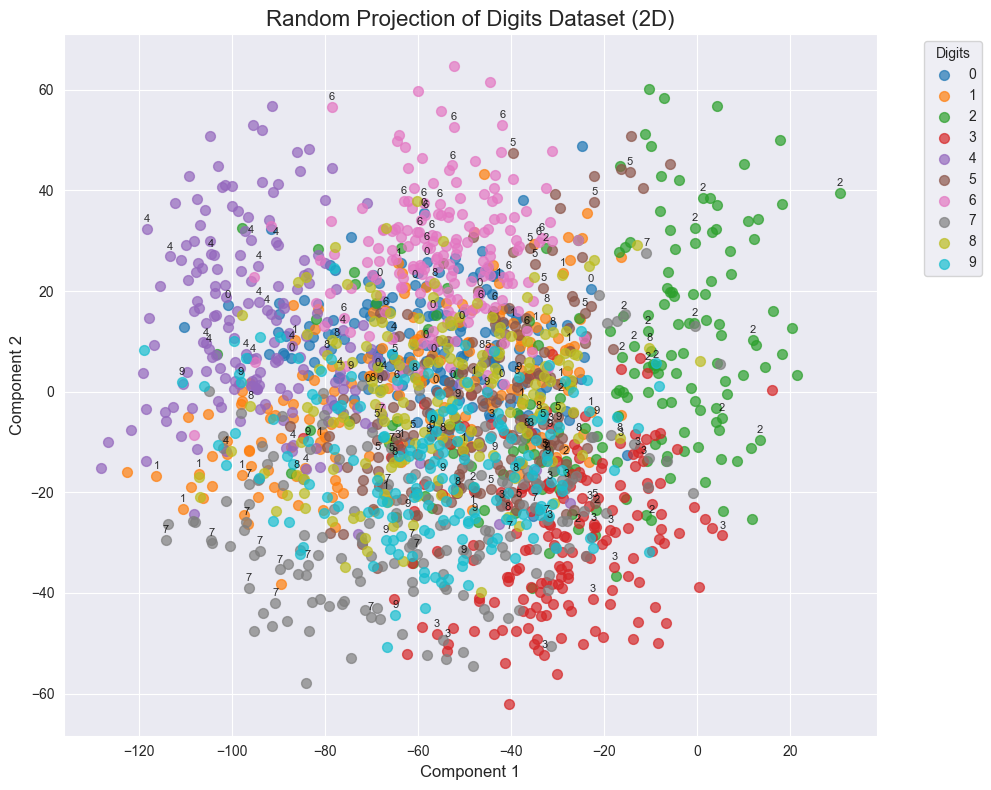

In [10]:
rp_2d=GaussianRandomProjection(n_components=2,random_state=42)
X_rp_2d=rp_2d.fit_transform(X,y)
plot_reduction_2d(X_rp_2d,y,"Random Projection of Digits Dataset (2D)")

### RP 3D

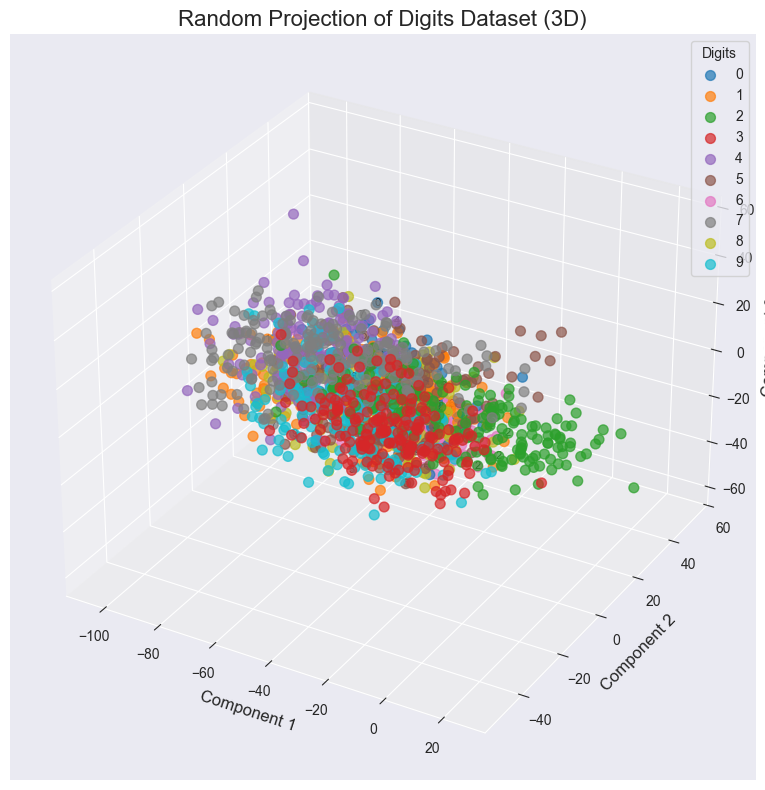

In [11]:
rp_3d=GaussianRandomProjection(n_components=3,random_state=42)
X_rp_3d=rp_3d.fit_transform(X,y)
plot_reduction_3d(X_rp_3d,y,"Random Projection of Digits Dataset (3D)")

## Multidimensional Scaling MDS



### 2D MDS


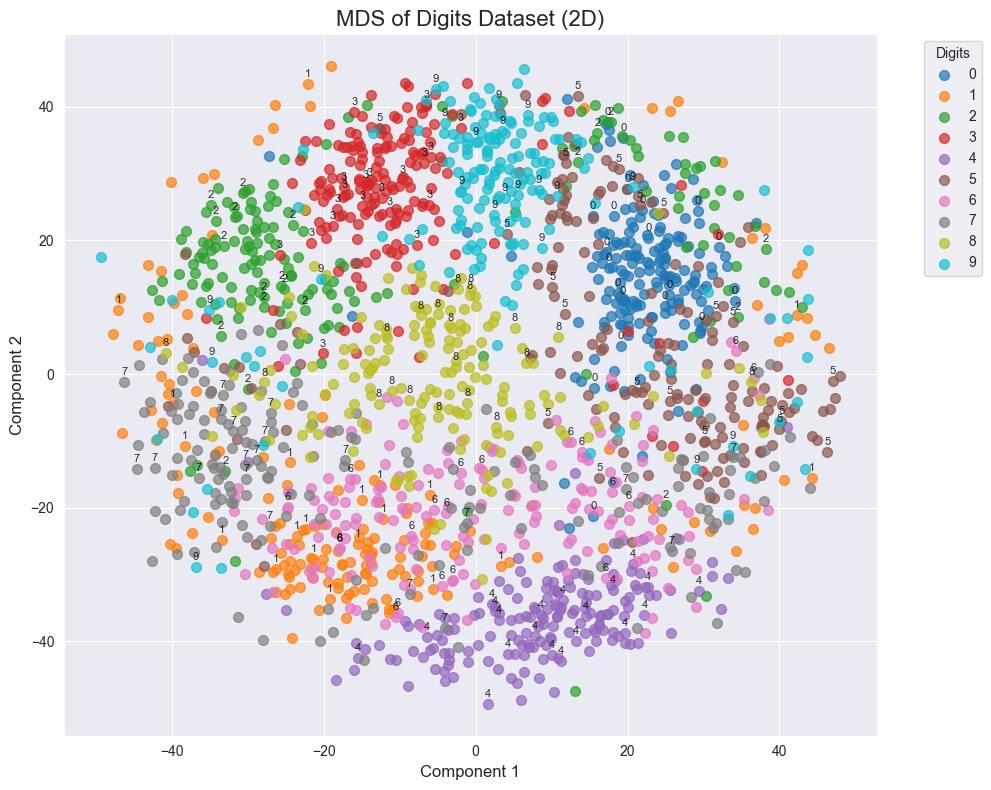

In [12]:

mds_2d = MDS(n_components=2, n_init=1, max_iter=120, random_state=42, normalized_stress='auto')
X_mds_2d = mds_2d.fit_transform(X)
plot_reduction_2d(X_mds_2d, y, 'MDS of Digits Dataset (2D)')

### 3D MDS

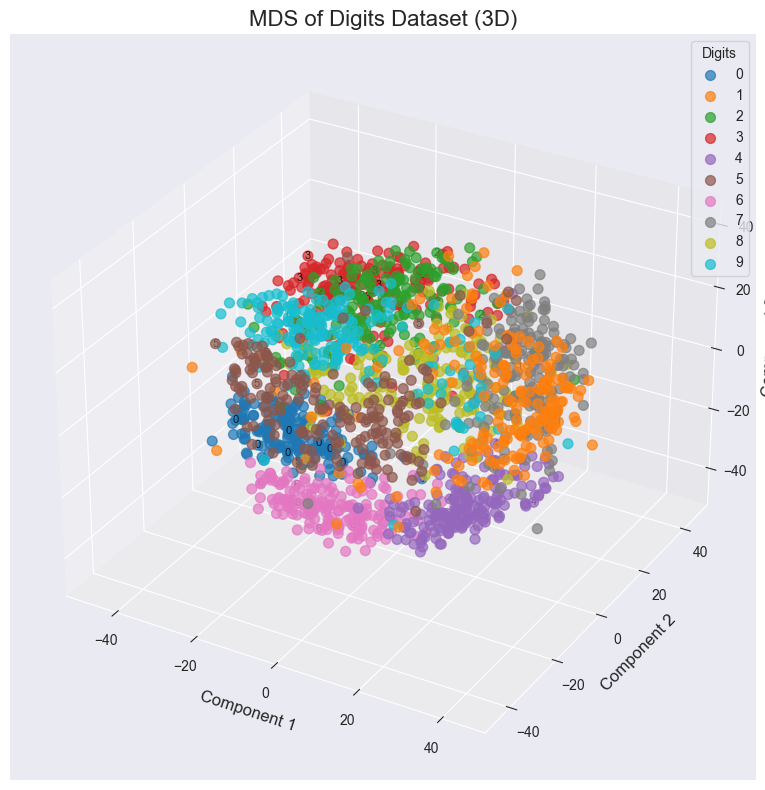

In [13]:

mds_3d = MDS(n_components=3, n_init=1, max_iter=120, random_state=42, normalized_stress='auto')
X_mds_3d = mds_3d.fit_transform(X)
plot_reduction_3d(X_mds_3d, y, 'MDS of Digits Dataset (3D)')

## t-Distributed Stochastic Neighbor Embedding (t-SNE)


### t-Sne 2D

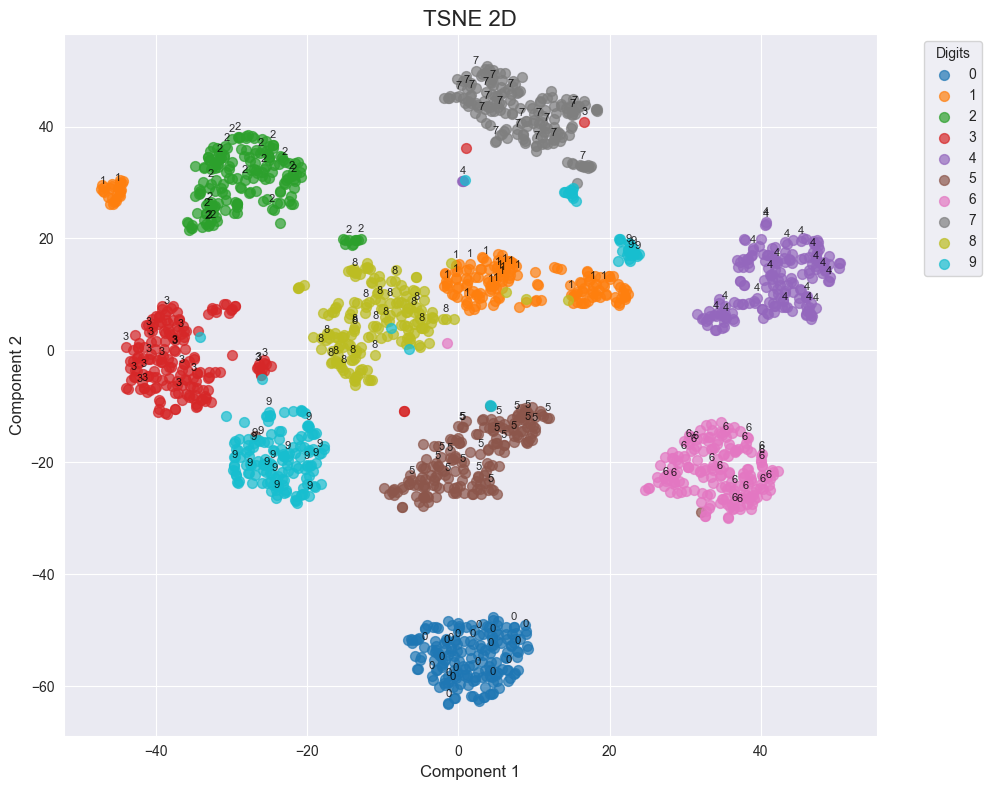

In [14]:
tsne_2d=TSNE(n_components=2,init='pca',learning_rate='auto',random_state=42,n_jobs=-1)
X_tsne_2d=tsne_2d.fit_transform(X)
plot_reduction_2d(X_tsne_2d, y, 'TSNE 2D')

In [15]:
### t-sne 3D

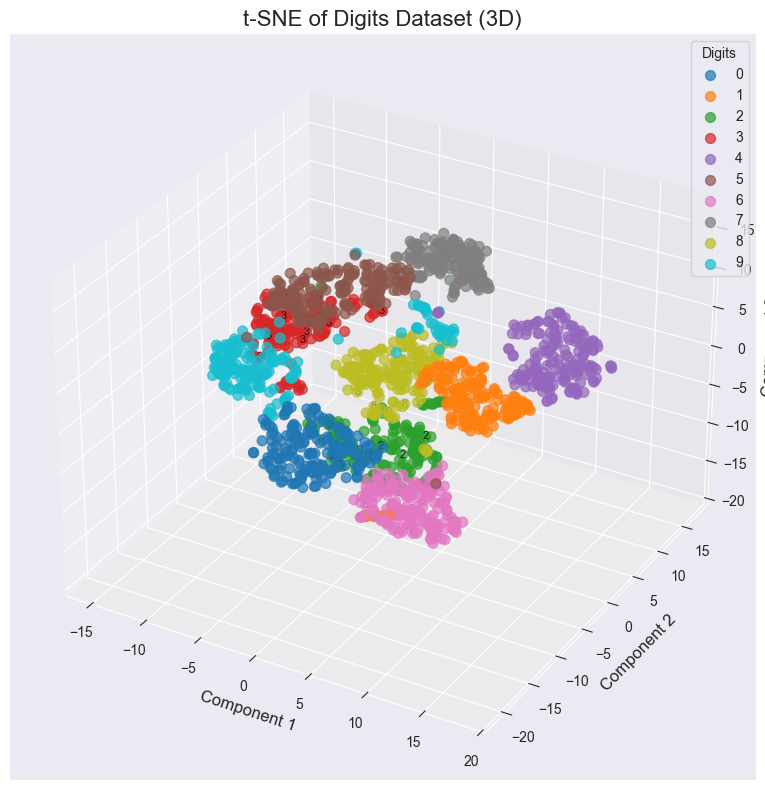

In [16]:
tsne_3d = TSNE(n_components=3, init='pca', learning_rate='auto', random_state=42, n_jobs=-1) # Use all cores
X_tsne_3d = tsne_3d.fit_transform(X)
plot_reduction_3d(X_tsne_3d, y, 't-SNE of Digits Dataset (3D)')

## Why t-SNE Is So Different from Other Dimensionality Reduction Methods

* Most traditional dimensionality reduction techniques — like PCA, LDA, ICA, or Random Projection — are linear methods.
* They assume that data lies roughly on a linear subspace of lower dimension. These methods try to find directions (axes) that maximize global variance or class separability.

### As a result:

* They preserve global geometry (large-scale structure).

* They may miss local, curved, or nonlinear relationships between points.

* The embeddings often look smooth but not necessarily clustered.

### intution :
* t-SNE doesn’t try to explain the entire data structure — it amplifies local neighborhoods and pushes apart dissimilar points, making natural clusters visually pop out.
* hat’s why when you plot t-SNE, you see distinct blobs for each class — unlike PCA or ICA, which show smoother, continuous distributions.

### Standardizing the data

Original data min/max: 0.0 16.0
Original data mean: 4.884164579855314

Scaled data min/max: -3.0125999462748765 42.379240200834595
Scaled data mean: 8.649483775599439e-19

Performing PCA on standardized data...


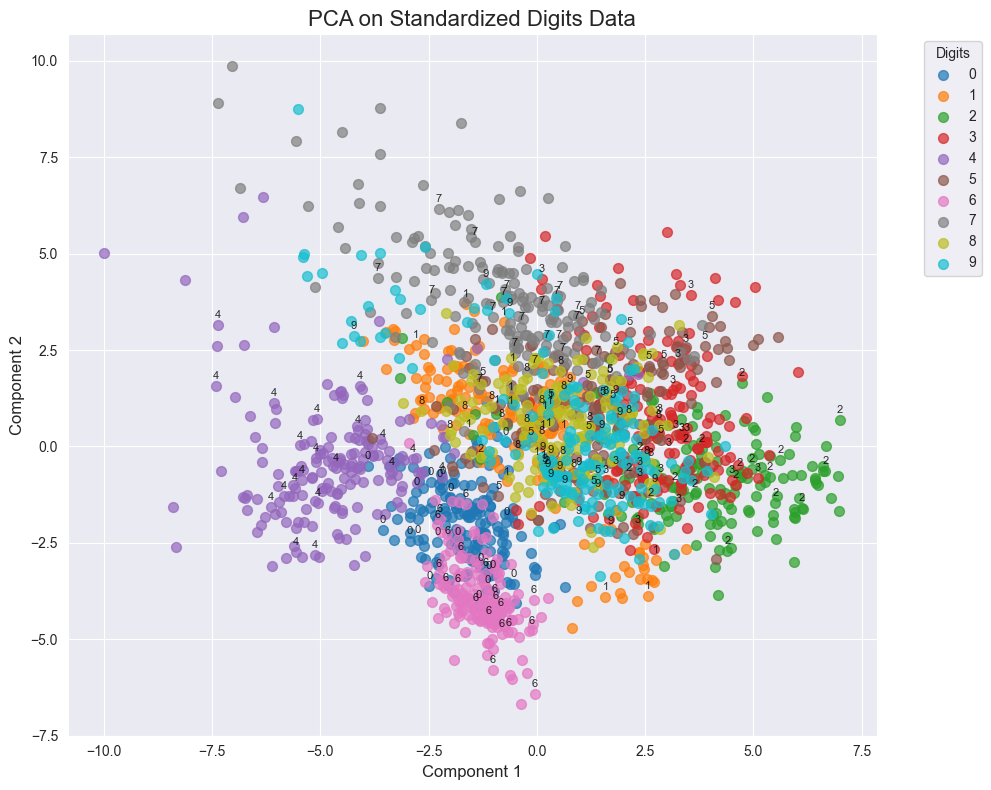

Performing LDA on standardized data...


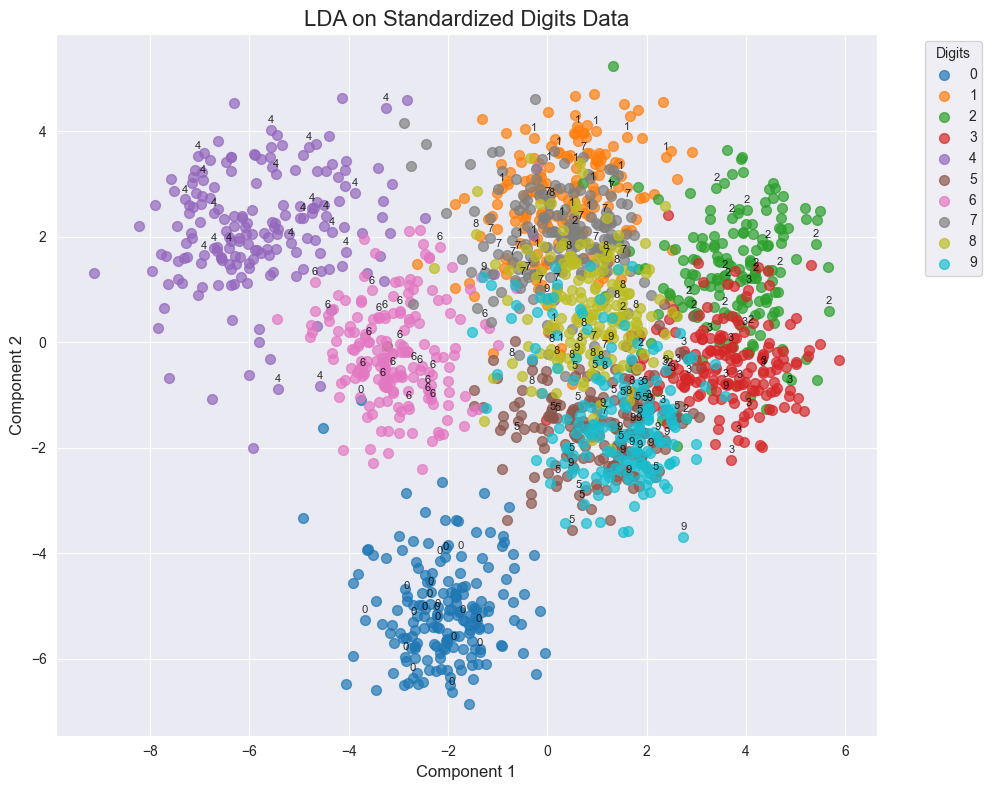

Performing t-SNE on standardized data (this might take a moment)...


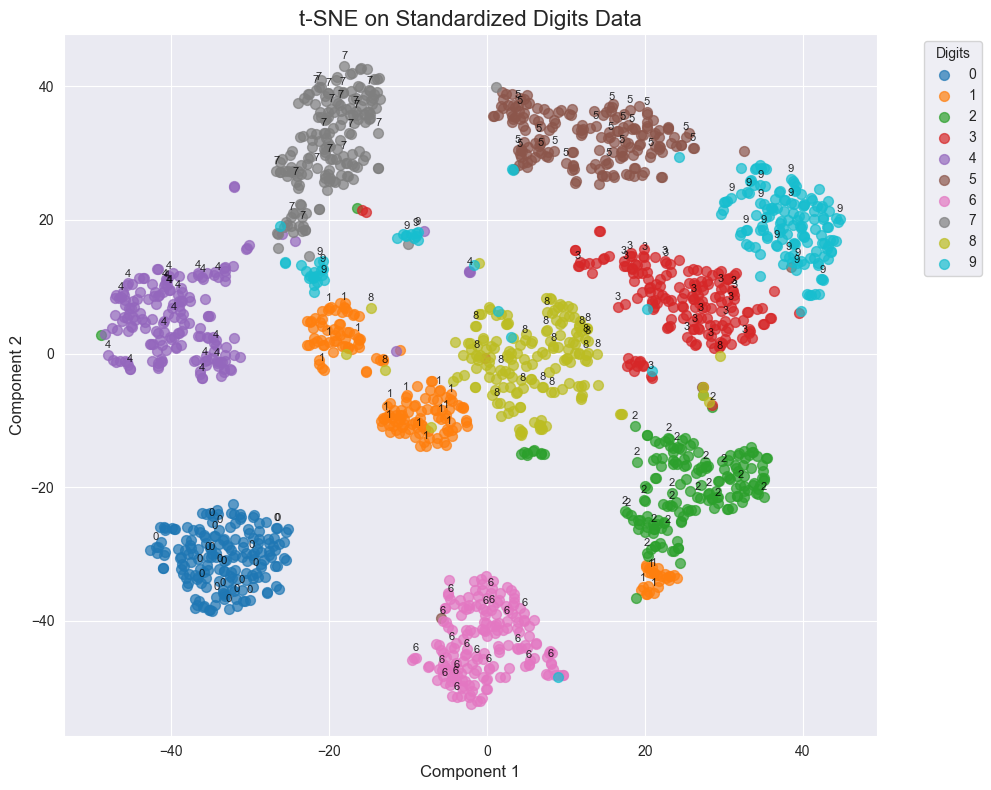

In [18]:

from sklearn.preprocessing import StandardScaler

# --- Step 1: Standardize the data ---
print("Original data min/max:", X.min(), X.max())
print("Original data mean:", X.mean())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nScaled data min/max:", X_scaled.min(), X_scaled.max())
print("Scaled data mean:", X_scaled.mean()) # Should be close to 0

# --- Step 2: Re-run visualizations on SCALED data ---

# PCA on Scaled Data
print("\nPerforming PCA on standardized data...")
pca_scaled = PCA(n_components=2)
X_pca_scaled = pca_scaled.fit_transform(X_scaled)
plot_reduction_2d(X_pca_scaled, y, 'PCA on Standardized Digits Data')

# LDA on Scaled Data
print("Performing LDA on standardized data...")
lda_scaled = LinearDiscriminantAnalysis(n_components=2)
X_lda_scaled = lda_scaled.fit_transform(X_scaled, y)
plot_reduction_2d(X_lda_scaled, y, 'LDA on Standardized Digits Data')

# t-SNE on Scaled Data
print("Performing t-SNE on standardized data (this might take a moment)...")
tsne_scaled = TSNE(n_components=2, init='pca', learning_rate='auto', random_state=42, n_jobs=-1)
X_tsne_scaled = tsne_scaled.fit_transform(X_scaled)
plot_reduction_2d(X_tsne_scaled, y, 't-SNE on Standardized Digits Data')


### Advanced Feature Engineering: Instead of using raw pixels, we'll extract more meaningful features that describe the shape of the digits using Histogram of Oriented Gradients (HOG).
* pixels are simple but not very descriptive. A '7' can be written in many ways, but what defines it are the specific lines and angles. HOG is excellent at capturing this shape information. It looks at small regions of the image and counts the occurrences of gradient orientation. In simple terms, it describes the edges and corners, which is perfect for differentiating digits.

* Superior Non-linear Visualization: We'll use UMAP (Uniform Manifold Approximation and Projection), an algorithm often considered an improvement over t-SNE, known for creating even cleaner clusters and better preserving the data's global structure.

* Combining hog and umap

Extracting HOG features...
Original feature shape: (1797, 64)
New HOG feature shape: (1797, 32)
Standardizing HOG features...
Performing UMAP (this is usually fast)...


C:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\hp\AppData\Local\Temp\ipykernel_7860\3635152806.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', n_classes)


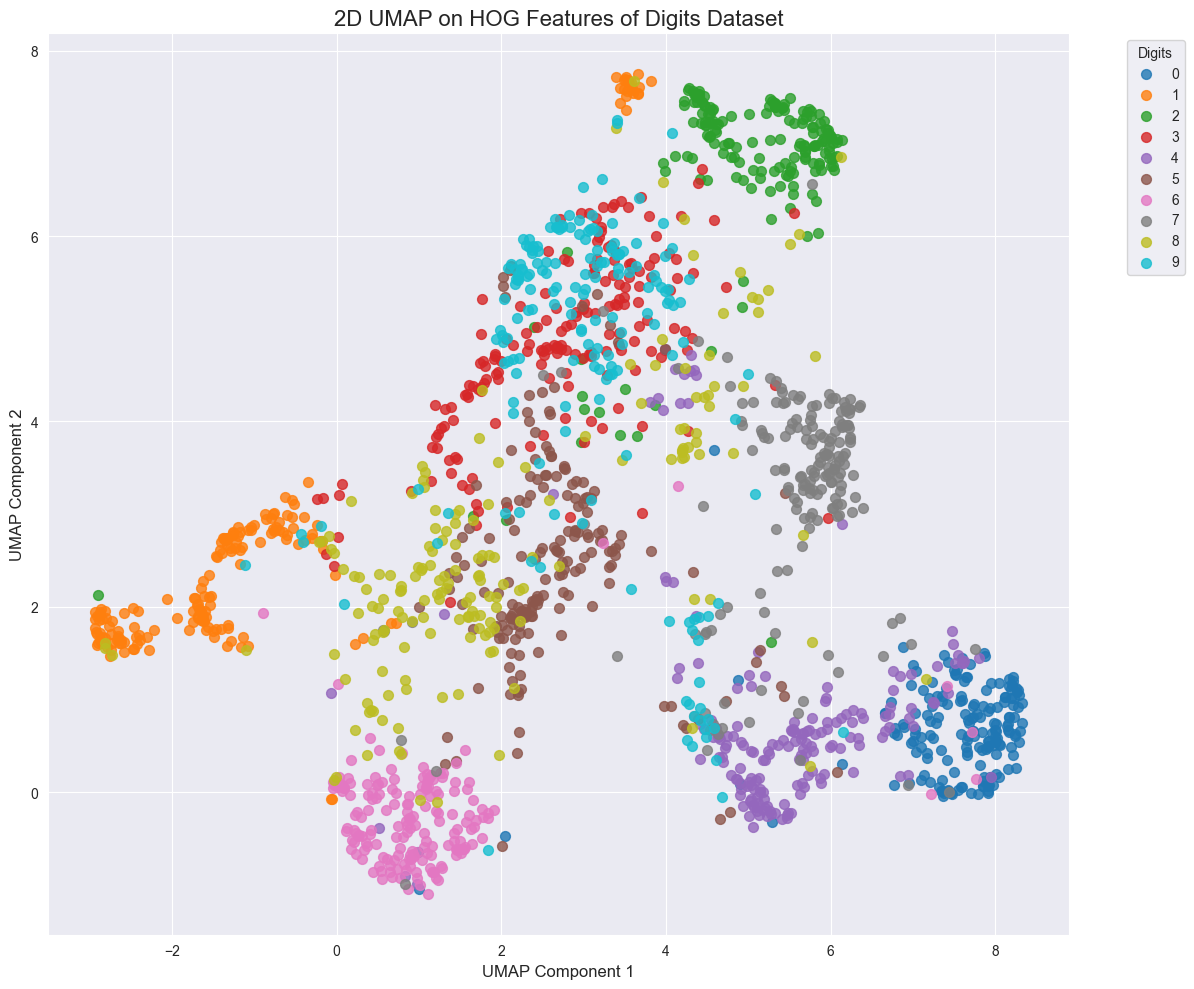

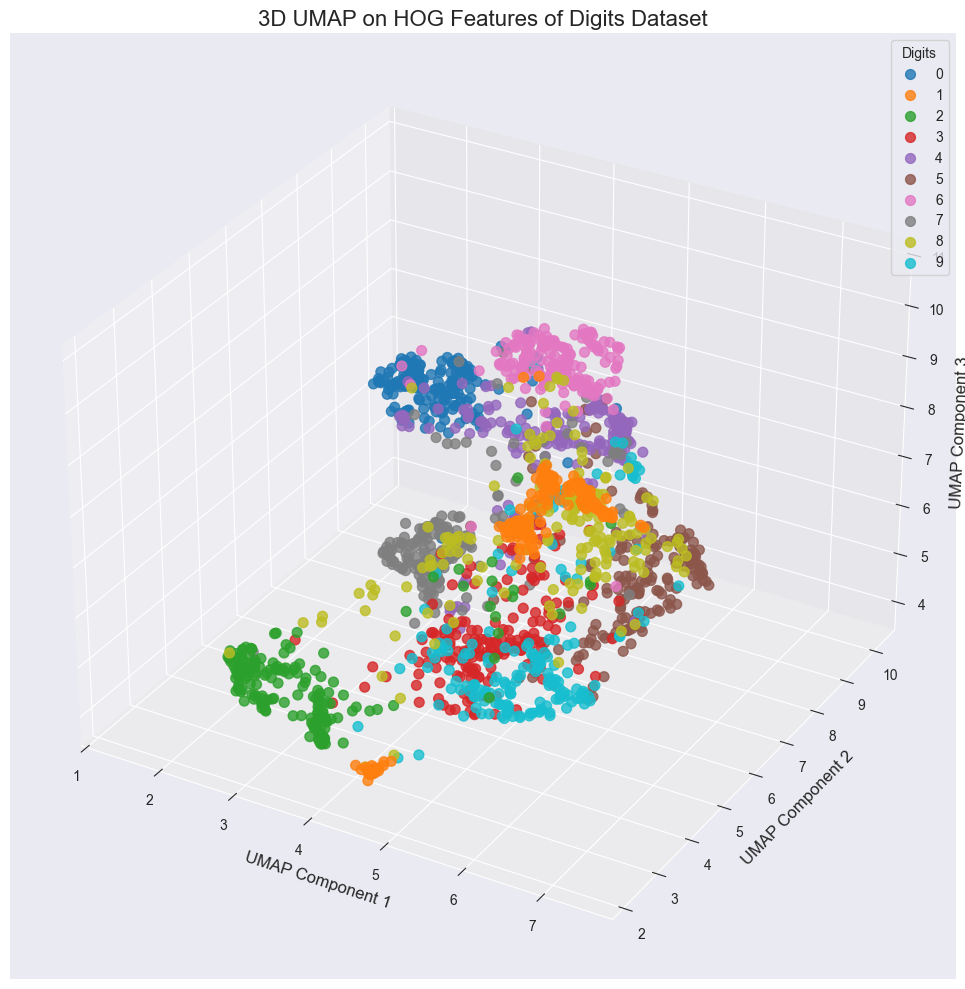

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import umap # UMAP library
from skimage.feature import hog # HOG feature extractor
from mpl_toolkits.mplot3d import Axes3D

# --- 1. Load Data ---
digits = datasets.load_digits()
X = digits.data
y = digits.target
n_classes = len(np.unique(y))
images = digits.images # We need the 8x8 images for HOG

# --- 2. Advanced Feature Engineering: HOG ---
print("Extracting HOG features...")
# Calculate HOG features for each image
# Parameters are tuned for small 8x8 images
hog_features = []
for image in images:
    features = hog(image, orientations=8, pixels_per_cell=(4, 4),
                   cells_per_block=(1, 1), block_norm='L2-Hys',
                   visualize=False, transform_sqrt=True)
    hog_features.append(features)

X_hog = np.array(hog_features)
print(f"Original feature shape: {X.shape}")
print(f"New HOG feature shape: {X_hog.shape}")

# --- 3. Preprocessing: Standardize the HOG features ---
print("Standardizing HOG features...")
scaler = StandardScaler()
X_hog_scaled = scaler.fit_transform(X_hog)

# --- 4. Superior Visualization: UMAP ---
print("Performing UMAP (this is usually fast)...")
# UMAP often works well with default parameters. n_neighbors controls the balance
# between local and global structure.
umap_reducer_2d = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
X_umap_2d = umap_reducer_2d.fit_transform(X_hog_scaled)

umap_reducer_3d = umap.UMAP(n_components=3, n_neighbors=15, min_dist=0.1, random_state=42)
X_umap_3d = umap_reducer_3d.fit_transform(X_hog_scaled)

# --- 5. Plotting (using refined functions from before) ---
cmap = plt.cm.get_cmap('tab10', n_classes)

def plot_reduction_2d(X_reduced, y, title):
    """Helper function to create a 2D scatter plot with digit labels"""
    plt.figure(figsize=(12, 10))
    for i in range(n_classes):
        plt.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1],
                    color=cmap(i), label=str(i), alpha=0.8, s=50)
    plt.title(title, fontsize=16)
    plt.xlabel('UMAP Component 1', fontsize=12)
    plt.ylabel('UMAP Component 2', fontsize=12)
    plt.legend(title='Digits', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_reduction_3d(X_reduced, y, title):
    """Helper function to create a 3D scatter plot"""
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(n_classes):
        ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2],
                   color=cmap(i), label=str(i), alpha=0.8, s=50)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('UMAP Component 1', fontsize=12)
    ax.set_ylabel('UMAP Component 2', fontsize=12)
    ax.set_zlabel('UMAP Component 3', fontsize=12)
    ax.legend(title='Digits')
    plt.tight_layout()
    plt.show()

# Visualize the final, amazing results!
plot_reduction_2d(X_umap_2d, y, '2D UMAP on HOG Features of Digits Dataset')
plot_reduction_3d(X_umap_3d, y, '3D UMAP on HOG Features of Digits Dataset')

### Why UMAP (or t-SNE) Curves Look Different After Applying HOG Features

* When you apply HOG (Histogram of Oriented Gradients) before UMAP or t-SNE, you’re fundamentally changing what kind of information each data point represents — and that’s why your manifold visualization looks completely different.
###  🔹 Step 1: What HOG Does

HOG is a feature descriptor, not a dimensionality reduction method.
It transforms each image (like a 28×28 digit) into a vector of gradient orientation histograms — describing edges, shapes, and textures rather than raw pixel intensities.

So instead of representing an image by pixel brightness, it represents it by local edge patterns — how curves and lines are oriented.

✅ This transformation makes the data more semantically meaningful (similar digits now have similar gradient distributions).

### 🔹 Step 2: What Happens When You Apply UMAP/t-SNE After HOG

When you run UMAP or t-SNE on raw pixel data, the algorithms try to cluster points based on pixel similarity.
This often captures superficial visual similarities — like overall brightness or stroke thickness — not actual shape structure.

But after applying HOG, you’ve replaced pixel values with high-level geometric features.

UMAP/t-SNE now receive a dataset where “similarity” reflects shape and orientation, not pixel-by-pixel distance.

As a result, they discover different manifolds — new relationships that represent actual digit morphology (like curved vs. straight digits).

### 🔹 Step 3: Why the Curves/Clusters Change

In raw pixel space, digits that look similar in brightness but have different shapes (e.g., ‘3’ and ‘8’) might end up close together.

In HOG space, those same digits are far apart, because their edge patterns differ.

UMAP/t-SNE thus form new clusters and curved manifolds — reflecting the geometry of shape rather than pixel similarity.

That’s why after applying HOG, your UMAP curves (or t-SNE embeddings) look more complex, curved, or differently separated — they’re now mapping relationships in feature space, not pixel space.